In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
labels = pd.read_csv('./data/hasyv2/hasy-data-labels.csv')

In [4]:
label_dict = {"times": 514, "plus": 196, "minus": 195, 'div': 526, 'eq': 621}
rel_list = [514, 196, 195, 526, 621]

In [5]:
rel_labels = labels[labels.symbol_id.isin(rel_list)]
rel_labels.head(3)

,path,symbol_id,latex,user_id
5568,hasy-data/v2-05568.png,195,-,31
5569,hasy-data/v2-05569.png,195,-,50
5570,hasy-data/v2-05570.png,195,-,5572


In [1]:
rel_labels

NameError: name 'rel_labels' is not defined

(32, 32, 3)

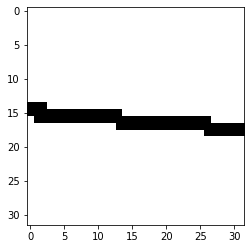

In [86]:
ROOTDIR = "./data/hasyv2/"

img = np.asarray(Image.open(ROOTDIR + "hasy-data/v2-05568.png"))

plt.imshow(img)
img.shape

In [87]:
# Create datafolder
import os
import shutil
from pathlib import Path
HASY_DIR = "./data/hasyv2/"
OPERATOR_DIR = "./data/operators"
rename_map = {514: "mul", 196: "plus", 195: "minus", 526: "div", 621: "eq"}


if not os.path.exists(OPERATOR_DIR):
    os.makedirs(OPERATOR_DIR)

minus = 0
plus = 0
mul = 0
div = 0
eq = 0
 

current_label = 195
for index, row in rel_labels.iterrows():
    if current_label != row.symbol_id: 
        current_label = row.symbol_id
    if rename_map[row.symbol_id] == "plus":
        plus += 1
        filename = "{}_{}".format(rename_map[row.symbol_id],plus)
    elif rename_map[row.symbol_id] == "minus":
        minus += 1
        filename = "{}_{}".format(rename_map[row.symbol_id],minus)
    elif rename_map[row.symbol_id] == "mul":
        mul += 1
        filename = "{}_{}".format(rename_map[row.symbol_id],mul)
    elif rename_map[row.symbol_id] == "div":
        div += 1
        filename = "{}_{}".format(rename_map[row.symbol_id],div)
    elif rename_map[row.symbol_id] == "eq":
        eq += 1
        filename = "{}_{}".format(rename_map[row.symbol_id],eq)
        

    old_path = HASY_DIR + row.path
    new_path = "{}/{}.png".format(OPERATOR_DIR,filename)
    shutil.copy(old_path, new_path)
    

In [82]:
div

0

In [10]:
import pandas as pd
import os
data = pd.DataFrame(columns = ["path", "label"])

i = 0
for file in os.listdir("./data/operators"):
    if "plus" in file:
        newrow = pd.DataFrame(columns = ["path", "label"],data = {"path": file, "label": 0}, index = [0])
        
    elif "minus" in file:
        newrow = pd.DataFrame(columns = ["path", "label"],data = {"path": file, "label": 1}, index = [0])

    elif "mul" in file:
        newrow = pd.DataFrame(columns = ["path", "label"],data = {"path": file, "label": 2}, index = [0])
        
    elif "div" in file:
        newrow = pd.DataFrame(columns = ["path", "label"],data = {"path": file, "label": 3}, index = [0])

    elif "eq" in file:
        newrow = pd.DataFrame(columns = ["path", "label"],data = {"path": file, "label": 4}, index = [0])
    
    data = data.append(newrow, ignore_index = True)
    i += 1

data = data.reset_index(drop=True)

In [11]:
data.to_csv('./data/operators/datasheet.csv')

In [12]:
data.shape

(1467, 2)